## Load Libraries and Dataset

In [ ]:
!pip install -v scikit-learn==0.23.0.

Created temporary directory: /tmp/pip-ephem-wheel-cache-_3qrj5ye
Created temporary directory: /tmp/pip-req-tracker-3l43nn0g
Created requirements tracker '/tmp/pip-req-tracker-3l43nn0g'
Created temporary directory: /tmp/pip-install-un_nycuz
1 location(s) to search for versions of scikit-learn:
* https://pypi.org/simple/scikit-learn/
Getting page https://pypi.org/simple/scikit-learn/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/scikit-learn/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/scikit-learn/ HTTP/1.1" 200 80178
Updating cache with response from "https://pypi.org/simple/scikit-learn/"
Caching due to etag
Analyzing links from page https://pypi.org/simple/scikit-learn/
  Found link https://files.pythonhosted.org/packages/cd/17/8624d6ba8d91f77fbbf4b6e42dda77450dd647125fcdb3f894c6b9d44a36/scikit-learn-0.9.tar.gz#sha256=5e083180a0eedf8e964c013731da30291afe

In [ ]:
pip install -v yellowbrick==1.3.post1

Created temporary directory: /tmp/pip-ephem-wheel-cache-kahk9ktf
Created temporary directory: /tmp/pip-req-tracker-aex30ca4
Created requirements tracker '/tmp/pip-req-tracker-aex30ca4'
Created temporary directory: /tmp/pip-install-308z36h7
1 location(s) to search for versions of yellowbrick:
* https://pypi.org/simple/yellowbrick/
Getting page https://pypi.org/simple/yellowbrick/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/yellowbrick/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/yellowbrick/ HTTP/1.1" 200 4370
Updating cache with response from "https://pypi.org/simple/yellowbrick/"
Caching due to etag
Analyzing links from page https://pypi.org/simple/yellowbrick/
  Skipping link: none of the wheel's tags match: py2-none-any: https://files.pythonhosted.org/packages/2a/27/0ff26cadaa272649a0c65ffb9a7dadfb46f85ca525b1abff1d0aee1edba8/yellowbrick-0.1-py2-none-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ocean-modelB/Data/final_big_five.csv')

In [ ]:
columns = df.columns
print(columns)

Index(['Unnamed: 0', 'EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7',
       'EXT8', 'EXT9', 'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6',
       'EST7', 'EST8', 'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5',
       'AGR6', 'AGR7', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4',
       'CSN5', 'CSN6', 'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3',
       'OPN4', 'OPN5', 'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10'],
      dtype='object')


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,1,5,2,5,1,5,2,4,1,1,4,4,2,2,2,2,2,3,2,2,5,2,4,2,3,2,4,3,4,3,4,3,2,2,4,4,2,4,4,5,1,4,1,4,1,5,3,4,5
1,3,5,3,4,3,3,2,5,1,5,2,3,4,1,3,1,2,1,3,1,1,4,1,5,1,5,3,4,5,3,3,2,5,3,3,1,3,3,5,3,1,2,4,2,3,1,4,2,5,3
2,2,3,4,4,3,2,1,3,2,5,4,4,4,2,2,2,2,2,1,3,1,4,1,4,2,4,1,4,4,3,4,2,2,2,3,3,4,2,4,2,5,1,2,1,4,2,5,3,4,4
3,2,2,2,3,4,2,2,4,1,4,3,3,3,2,3,2,2,2,4,3,2,4,3,4,2,4,2,4,3,4,2,4,4,4,1,2,2,3,1,4,4,2,5,2,3,1,4,4,3,3
4,3,3,3,3,5,3,3,5,3,4,1,5,5,3,1,1,1,1,3,2,1,5,1,5,1,3,1,5,5,3,5,1,5,1,3,1,5,1,5,5,5,1,5,1,5,1,5,3,5,5


In [ ]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
df.apply(minMax)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
min,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
max,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
df.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.00000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000,874434.000000
mean,2.645693,2.795889,3.298964,3.167806,3.297512,2.411223,2.780479,3.443987,2.979535,3.588282,3.310360,3.197204,3.867576,2.689094,2.852700,2.866246,3.063028,2.694104,3.103318,2.795166,2.247902,3.867886,2.270176,3.956921,2.285038,3.778318,2.209351,3.719934,3.807989,3.617462,3.341473,2.949740,4.004439,2.630877,2.634131,2.841238,3.733087,2.480876,3.222857,3.627431,3.703026,2.07053,4.035008,1.995491,3.824307,1.901202,4.022261,3.221340,4.166739,3.983939
std,1.250871,1.306720,1.188259,1.210432,1.239669,1.208842,1.380444,1.242385,1.325278,1.274354,1.318007,1.191387,1.129266,1.227439,1.254425,1.296906,1.270450,1.324289,1.274190,1.305114,1.321227,1.080140,1.266212,1.075868,1.155366,1.165019,1.105146,1.041956,1.131329,1.030953,1.122325,1.372541,0.995169,1.232578,1.254199,1.399420,1.079109,1.120525,1.248199,0.998013,1.100078,1.09506,1.040036,1.071258,0.933451,1.084797,0.935574,1.222737,0.971584,0.986196
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.00000,3.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,2.00000,4.000000,2.000000,4.000000,2.000000,4.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,3.00000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5

## Normalization

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = columns[1:51])

In [ ]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,0.75,0.00,1.00,0.25,1.00,0.00,1.00,0.25,0.75,0.00,0.00,0.75,0.75,0.25,0.25,0.25,0.25,0.25,0.50,0.25,0.25,1.00,0.25,0.75,0.25,0.50,0.25,0.75,0.50,0.75,0.50,0.75,0.50,0.25,0.25,0.75,0.75,0.25,0.75,0.75,1.00,0.00,0.75,0.00,0.75,0.00,1.00,0.50,0.75,1.00
1,0.50,1.00,0.50,0.75,0.50,0.50,0.25,1.00,0.00,1.00,0.25,0.50,0.75,0.00,0.50,0.00,0.25,0.00,0.50,0.00,0.00,0.75,0.00,1.00,0.00,1.00,0.50,0.75,1.00,0.50,0.50,0.25,1.00,0.50,0.50,0.00,0.50,0.50,1.00,0.50,0.00,0.25,0.75,0.25,0.50,0.00,0.75,0.25,1.00,0.50
2,0.25,0.50,0.75,0.75,0.50,0.25,0.00,0.50,0.25,1.00,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.25,0.00,0.50,0.00,0.75,0.00,0.75,0.25,0.75,0.00,0.75,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.75,0.25,0.75,0.25,1.00,0.00,0.25,0.00,0.75,0.25,1.00,0.50,0.75,0.75
3,0.25,0.25,0.25,0.50,0.75,0.25,0.25,0.75,0.00,0.75,0.50,0.50,0.50,0.25,0.50,0.25,0.25,0.25,0.75,0.50,0.25,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.50,0.75,0.25,0.75,0.75,0.75,0.00,0.25,0.25,0.50,0.00,0.75,0.75,0.25,1.00,0.25,0.50,0.00,0.75,0.75,0.50,0.50
4,0.50,0.50,0.50,0.50,1.00,0.50,0.50,1.00,0.50,0.75,0.00,1.00,1.00,0.50,0.00,0.00,0.00,0.00,0.50,0.25,0.00,1.00,0.00,1.00,0.00,0.50,0.00,1.00,1.00,0.50,1.00,0.00,1.00,0.00,0.50,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.50,1.00,1.00


## Deteminimg optimum number of clusters

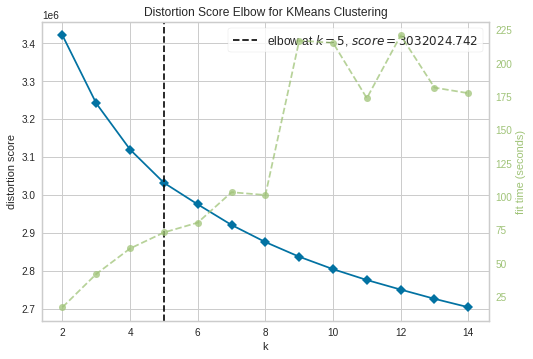

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

visualizer.fit(df)        
visualizer.show()  

## KMeans Algorithm

In [ ]:
kmeans = KMeans(n_clusters = 5)
k_fit = kmeans.fit(df)

In [ ]:
predictions = k_fit.labels_
df['Clusters'] = predictions
df.head(15)

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.75,0.00,1.00,0.25,1.00,0.00,1.00,0.25,0.75,0.00,0.00,0.75,0.75,0.25,0.25,0.25,0.25,0.25,0.50,0.25,0.25,1.00,0.25,0.75,0.25,0.50,0.25,0.75,0.50,0.75,0.50,0.75,0.50,0.25,0.25,0.75,0.75,0.25,0.75,0.75,1.00,0.00,0.75,0.00,0.75,0.00,1.00,0.50,0.75,1.00,3
1,0.50,1.00,0.50,0.75,0.50,0.50,0.25,1.00,0.00,1.00,0.25,0.50,0.75,0.00,0.50,0.00,0.25,0.00,0.50,0.00,0.00,0.75,0.00,1.00,0.00,1.00,0.50,0.75,1.00,0.50,0.50,0.25,1.00,0.50,0.50,0.00,0.50,0.50,1.00,0.50,0.00,0.25,0.75,0.25,0.50,0.00,0.75,0.25,1.00,0.50,0
2,0.25,0.50,0.75,0.75,0.50,0.25,0.00,0.50,0.25,1.00,0.75,0.75,0.75,0.25,0.25,0.25,0.25,0.25,0.00,0.50,0.00,0.75,0.00,0.75,0.25,0.75,0.00,0.75,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.75,0.25,0.75,0.25,1.00,0.00,0.25,0.00,0.75,0.25,1.00,0.50,0.75,0.75,0
3,0.25,0.25,0.25,0.50,0.75,0.25,0.25,0.75,0.00,0.75,0.50,0.50,0.50,0.25,0.50,0.25,0.25,0.25,0.75,0.50,0.25,0.75,0.50,0.75,0.25,0.75,0.25,0.75,0.50,0.75,0.25,0.75,0.75,0.75,0.00,0.25,0.25,0.50,0.00,0.75,0.75,0.25,1.00,0.25,0.50,0.00,0.75,0.75,0.50,0.50,2
4,0.50,0.50,0.50,0.50,1.00,0.50,0.50,1.00,0.50,0.75,0.00,1.00,1.00,0.50,0.00,0.00,0.00,0.00,0.50,0.25,0.00,1.00,0.00,1.00,0.00,0.50,0.00,1.00,1.00,0.50,1.00,0.00,1.00,0.00,0.50,0.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.50,1.00,1.00,3
5,0.50,0.50,0.75,0.25,0.75,0.25,0.25,0.50,0.50,0.75,0.50,0.75,0.50,0.25,0.25,0.00,0.25,0.00,0.25,0.25,0.25,0.50,0.00,0.75,0.25,0.50,0.25,0.50,0.75,0.75,0.50,0.25,0.75,0.00,0.50,0.25,0.75,0.50,0.75,0.50,1.00,0.00,1.00,0.00,0.50,0.00,1.00,0.75,1.00,0.25,3
6,0.75,0.50,0.75,0.50,0.50,0.50,1.00,0.50,0.75,0.50,0.25,0.75,0.75,0.25,0.75,0.25,0.25,0.25,0.75,0.75,0.00,0.25,0.00,1.00,0.50,1.00,0.50,0.75,0.75,1.00,0.50,0.25,0.75,0.25,0.00,0.75,0.75,0.25,0.25,1.00,1.00,0.25,0.75,0.50,0.75,0.00,1.00,1.00,0.75,0.75,1
7,0.50,0.00,1.00,0.25,1.00,0.25,1.00,0.25,0.50,0.25,0.25,0.75,0.25,0.75,0.25,0.00,0.25,0.00,0.00,0.00,0.25,1.00,0.25,0.75,0.50,0.25,0.25,0.75,0.75,0.75,1.00,0.00,1.00,0.00,0.75,0.25,0.50,0.25,1.00,1.00,0.75,0.00,0.50,0.00,1.00,0.00,0.75,0.50,0.75,1.00,3
8,0.00,1.00,0.50,1.00,0.25,0.50,0.25,0.75,1.00,0.75,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.50,0.50,0.50,1.00,0.50,1.00,0.00,1.00,0.50,0.75,0.25,0.50,0.25,0.25,1.00,0.00,1.00,0.00,0.75,0.50,0.75,0.25,0.25,0.50,0.00,0.50,0.00,0.50,0.50,0.75,0.50,0.50,0.50,2
9,0.50,0.50,0.25,0.50,0.50,0.25,0.75,0.50,0.50,1.00,0.75,0.50,0.75,0.00,0.25,0.50,1.00,0.75,0.75,1.00,0.25,1.00,0.50,0.75,0.25,0.50,0.00,0.50,0.75,0.25,0.00,1.00,1.00,1.00,0.00,1.00,0.50,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1


In [ ]:
counts = df.Clusters.value_counts()
counts = pd.DataFrame(counts)

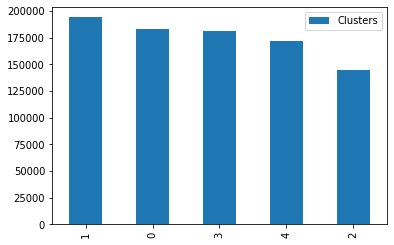

In [ ]:
counts.plot.bar()

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data = pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,0.887378,-1.549378,3
1,-2.003865,0.428740,0
2,-1.991828,0.173711,0
3,0.136745,0.238875,2
4,0.752152,-1.220378,3


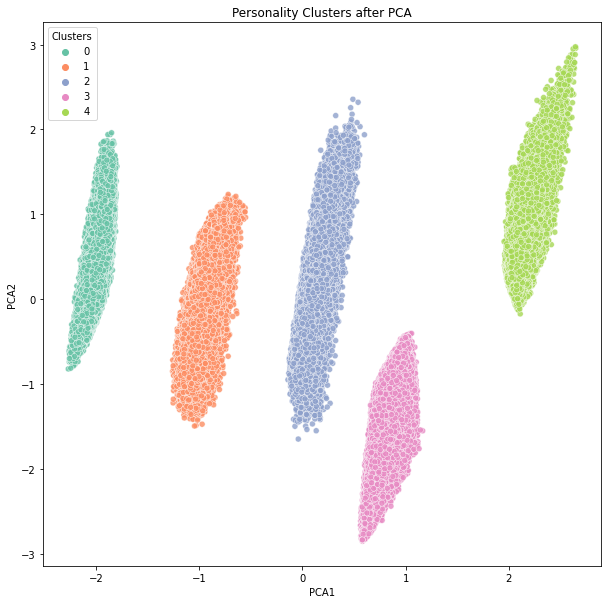

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = df_pca, x='PCA1', y='PCA2', hue='Clusters', palette ='Set2', alpha = 0.8)
plt.title('Personality Clusters after PCA');

In [ ]:
pd.options.display.max_columns = 150
df.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.285523,0.571153,0.532549,0.660366,0.499260,0.423539,0.309448,0.748643,0.334087,0.779264,0.625388,0.527153,0.785234,0.409902,0.451876,0.445282,0.460642,0.350883,0.485995,0.418753,0.214127,0.745358,0.167044,0.844335,0.241176,0.793948,0.247648,0.750993,0.796473,0.684184,0.712526,0.305264,0.822723,0.252660,0.561771,0.265500,0.791546,0.254175,0.710046,0.722308,0.639526,0.289689,0.717381,0.269968,0.677767,0.249044,0.751142,0.488002,0.813087,0.695928
1,0.611519,0.229490,0.698439,0.377219,0.763600,0.205758,0.663573,0.442431,0.692767,0.501750,0.709241,0.484738,0.813979,0.353579,0.571531,0.623206,0.703944,0.616762,0.665288,0.548422,0.284205,0.824427,0.413508,0.800522,0.249391,0.755608,0.213332,0.728730,0.784767,0.714506,0.497124,0.654268,0.713928,0.560791,0.307818,0.630005,0.619042,0.457990,0.487853,0.623995,0.695419,0.275600,0.817846,0.237710,0.743658,0.191013,0.748556,0.599857,0.804341,0.802720
2,0.291194,0.608822,0.450053,0.645066,0.404871,0.464658,0.282172,0.675145,0.427777,0.745505,0.360371,0.678796,0.532210,0.498222,0.349550,0.278081,0.352535,0.254590,0.428744,0.346368,0.525707,0.497904,0.421179,0.461239,0.571887,0.434135,0.536461,0.485777,0.418314,0.517573,0.568122,0.481363,0.705956,0.371886,0.356812,0.457981,0.635791,0.399540,0.469170,0.627434,0.683632,0.238449,0.699878,0.263345,0.699771,0.262220,0.771733,0.580275,0.728397,0.712538
3,0.620300,0.233938,0.836095,0.303448,0.820088,0.165695,0.724125,0.449472,0.691671,0.377255,0.329609,0.713135,0.535292,0.579624,0.278717,0.226328,0.277327,0.168432,0.279837,0.179281,0.223165,0.862061,0.212826,0.811324,0.218207,0.712423,0.149844,0.774680,0.771451,0.799741,0.684910,0.400456,0.797614,0.227918,0.530543,0.324375,0.717545,0.237731,0.643812,0.721279,0.728540,0.186598,0.774835,0.197512,0.792371,0.164697,0.833680,0.564473,0.776741,0.824416
4,0.200040,0.659357,0.308866,0.767084,0.323815,0.547052,0.185278,0.771474,0.291184,0.872657,0.822895,0.363703,0.881872,0.282840,0.643358,0.724763,0.751192,0.694313,0.752346,0.739164,0.361358,0.596584,0.392724,0.716028,0.385511,0.720316,0.425033,0.612829,0.673440,0.516322,0.459082,0.589892,0.705778,0.619959,0.273856,0.621539,0.644351,0.509860,0.447922,0.581045,0.629718,0.345336,0.768611,0.281110,0.607928,0.271694,0.672065,0.546066,0.823673,0.680491


## Aggregating Traits

In [ ]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['Extraversion'] = df[ext].sum(axis=1) * 5
data_sums['Neuroticism'] = df[est].sum(axis=1) * 5
data_sums['Agreeableness'] = df[agr].sum(axis=1) * 5
data_sums['Conscientiousness'] = df[csn].sum(axis=1) * 5
data_sums['Openness'] = df[opn].sum(axis=1) * 5
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
clusters,,,,,
0,25.719160,24.805537,27.426436,26.992584,27.957673
1,25.932724,30.453445,28.844983,27.764072,29.583602
2,24.976315,20.397337,24.350878,25.370279,28.201187
3,26.110432,17.837909,27.678615,26.430915,29.219315
4,24.634041,33.282228,27.000717,27.266419,28.133458


## Visualizing scores for clusters

In [ ]:
dataclusters = data_sums.groupby('clusters').mean()

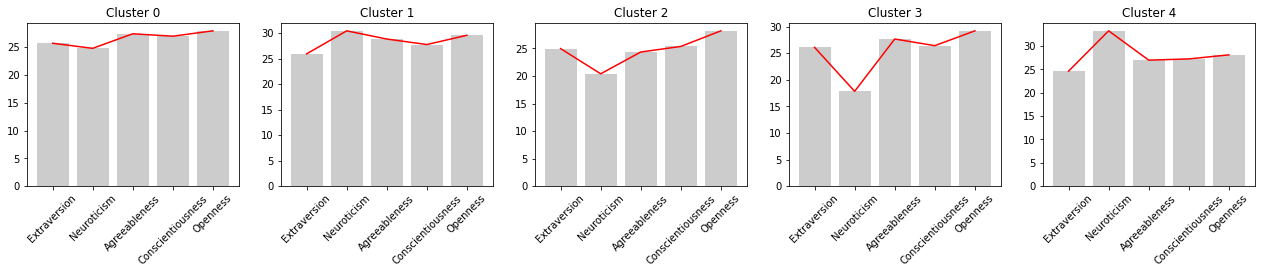

In [ ]:
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[i, :], color='black', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[i, :], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)

In [ ]:
import pickle
pickle.dump(kmeans, open("/content/drive/MyDrive/ocean-modelB/Data/model.pkl", "wb")) 

In [ ]:
dataclusters = pd.DataFrame(dataclusters)

In [ ]:
dataclusters = dataclusters.round(2)

In [ ]:
dataclusters = dataclusters.apply(lambda x: np.round(x*100/50, 0))
dataclusters.astype('int')

,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
clusters,,,,,
0,51,50,55,54,56
1,52,61,58,56,59
2,50,41,49,51,56
3,52,36,55,53,58
4,49,67,54,55,56


In [ ]:
dataclusters.to_csv('/content/drive/MyDrive/ocean-modelB/Data/clusters.csv')